In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
verbose = False

In [4]:
# Spécifiez les colonnes manuellement (remplacez-les par les vraies si possible)
col_names = ["NAME", "RA", "DEC", "TRIGGER_TIME", "T90", "T90_ERROR", "T90_START", 
             "FLUENCE", "FLUENCE_ERROR", "FLUX_1024", "FLUX_1024_ERROR", "FLUX_1024_TIME", 
             "FLUX_64", "FLUX_64_ERROR", "FLNC_BAND_EPEAK", "ERROR_RADIUS", "T50", "T50_ERROR", 
             "T50_START", "PFLX_PLAW_AMPL", "PFLX_PLAW_PIVOT", "PFLX_PLAW_INDEX", 
             "PFLX_PLAW_INDEX_POS_ERR", "PFLX_PLAW_INDEX_NEG_ERR", "PFLX_PLAW_PHTFLUX", 
             "PFLX_PLAW_PHTFLNC", "PFLX_PLAW_ERGFLUX", "PFLX_COMP_EPEAK", "PFLX_COMP_PIVOT", 
             "PFLX_BAND_EPEAK", "PFLX_BAND_ALPHA", "PFLX_BAND_BETA", "PFLX_BAND_PHTFLUX"]

# selected_columns = ["FLUENCE", "FLUX_1024", "FLUX_64", "FLNC_BAND_EPEAK", "PFLX_PLAW_AMPL", "PFLX_PLAW_PIVOT", "PFLX_PLAW_INDEX", "PFLX_PLAW_PHTFLUX", "PFLX_PLAW_PHTFLNC", "PFLX_PLAW_ERGFLUX"]

# Lire le fichier en ignorant les lignes de l’en-tête
df_fermi = pd.read_csv("../datasets/fermi-gbm.fits", delim_whitespace=True, names=col_names, comment='/', skiprows=50)
# df_new = pd.read_csv("../../../datasets/fermi-gbm.fits", delim_whitespace=True, comment='/', skiprows=49, header=0)
df_fermi.head()

/var/folders/l9/wzf2dk9964sdl5zk6cl92hvm0000gp/T/ipykernel_9751/2784403070.py:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_fermi = pd.read_csv("../datasets/fermi-gbm.fits", delim_whitespace=True, names=col_names, comment='/', skiprows=50)


,NAME,RA,DEC,TRIGGER_TIME,T90,T90_ERROR,T90_START,FLUENCE,FLUENCE_ERROR,FLUX_1024,...,PFLX_PLAW_INDEX_NEG_ERR,PFLX_PLAW_PHTFLUX,PFLX_PLAW_PHTFLNC,PFLX_PLAW_ERGFLUX,PFLX_COMP_EPEAK,PFLX_COMP_PIVOT,PFLX_BAND_EPEAK,PFLX_BAND_ALPHA,PFLX_BAND_BETA,PFLX_BAND_PHTFLUX
0,GRB200119692,271.04,-77.14,58867.692448,19.200,1.999,-10.240,1.874300e-06,2.994000e-08,4.7410,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,GRB210919653,215.16,-77.10,59476.652685,1.600,1.243,-0.064,3.307100e-07,1.425300e-08,2.3367,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GRB210826293,64.63,-77.07,59452.292884,19.712,1.145,0.512,1.205200e-05,6.061600e-08,7.5118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GRB190628521,144.08,-77.07,58662.521474,19.200,2.757,-4.096,2.260600e-06,5.978300e-08,3.1749,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,GRB221203537,355.06,-68.97,59916.536799,3.520,0.945,0.000,8.198100e-07,2.093300e-08,3.5211,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_fermi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3825 entries, 0 to 3824
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   NAME                     3825 non-null   object 
 1   RA                       3825 non-null   float64
 2   DEC                      3825 non-null   float64
 3   TRIGGER_TIME             3825 non-null   float64
 4   T90                      3825 non-null   float64
 5   T90_ERROR                3825 non-null   float64
 6   T90_START                3825 non-null   float64
 7   FLUENCE                  3825 non-null   float64
 8   FLUENCE_ERROR            3825 non-null   float64
 9   FLUX_1024                3825 non-null   float64
 10  FLUX_1024_ERROR          3825 non-null   float64
 11  FLUX_1024_TIME           3825 non-null   float64
 12  FLUX_64                  3825 non-null   float64
 13  FLUX_64_ERROR            3825 non-null   float64
 14  FLNC_BAND_EPEAK         

In [6]:
df_fermi['category'] = df_fermi['T90'].apply(lambda x: 'low' if x < 2 else ('high' if x > 20 else 'undefined'))         

In [7]:
selected_columns = ["FLUENCE", "FLUX_1024", "FLUX_64", "FLNC_BAND_EPEAK", "PFLX_PLAW_AMPL", "PFLX_PLAW_PIVOT", "PFLX_PLAW_INDEX", "PFLX_PLAW_PHTFLUX", "PFLX_PLAW_PHTFLNC", "PFLX_PLAW_ERGFLUX", "category"]

df_fermi =df_fermi[selected_columns]
df_fermi.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3825 entries, 0 to 3824
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   FLUENCE            3825 non-null   float64
 1   FLUX_1024          3825 non-null   float64
 2   FLUX_64            3825 non-null   float64
 3   FLNC_BAND_EPEAK    3825 non-null   float64
 4   PFLX_PLAW_AMPL     2275 non-null   float64
 5   PFLX_PLAW_PIVOT    2274 non-null   float64
 6   PFLX_PLAW_INDEX    2274 non-null   float64
 7   PFLX_PLAW_PHTFLUX  2274 non-null   float64
 8   PFLX_PLAW_PHTFLNC  2274 non-null   float64
 9   PFLX_PLAW_ERGFLUX  2274 non-null   float64
 10  category           3825 non-null   object 
dtypes: float64(10), object(1)
memory usage: 328.8+ KB


In [8]:
for column in df_fermi.columns :
    nan_count = df_fermi[column].isna().sum()
    print(f"Number of NaN values in the {column}: {nan_count}")

Number of NaN values in the FLUENCE: 0
Number of NaN values in the FLUX_1024: 0
Number of NaN values in the FLUX_64: 0
Number of NaN values in the FLNC_BAND_EPEAK: 0
Number of NaN values in the PFLX_PLAW_AMPL: 1550
Number of NaN values in the PFLX_PLAW_PIVOT: 1551
Number of NaN values in the PFLX_PLAW_INDEX: 1551
Number of NaN values in the PFLX_PLAW_PHTFLUX: 1551
Number of NaN values in the PFLX_PLAW_PHTFLNC: 1551
Number of NaN values in the PFLX_PLAW_ERGFLUX: 1551
Number of NaN values in the category: 0


In [9]:
df_fermi = df_fermi.dropna()
df_fermi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2274 entries, 5 to 3824
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   FLUENCE            2274 non-null   float64
 1   FLUX_1024          2274 non-null   float64
 2   FLUX_64            2274 non-null   float64
 3   FLNC_BAND_EPEAK    2274 non-null   float64
 4   PFLX_PLAW_AMPL     2274 non-null   float64
 5   PFLX_PLAW_PIVOT    2274 non-null   float64
 6   PFLX_PLAW_INDEX    2274 non-null   float64
 7   PFLX_PLAW_PHTFLUX  2274 non-null   float64
 8   PFLX_PLAW_PHTFLNC  2274 non-null   float64
 9   PFLX_PLAW_ERGFLUX  2274 non-null   float64
 10  category           2274 non-null   object 
dtypes: float64(10), object(1)
memory usage: 213.2+ KB


In [10]:
X = df_fermi.drop(columns=['category'])  
y = df_fermi['category']

In [11]:
# Algorithme de K-means
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X)

# Centroids and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

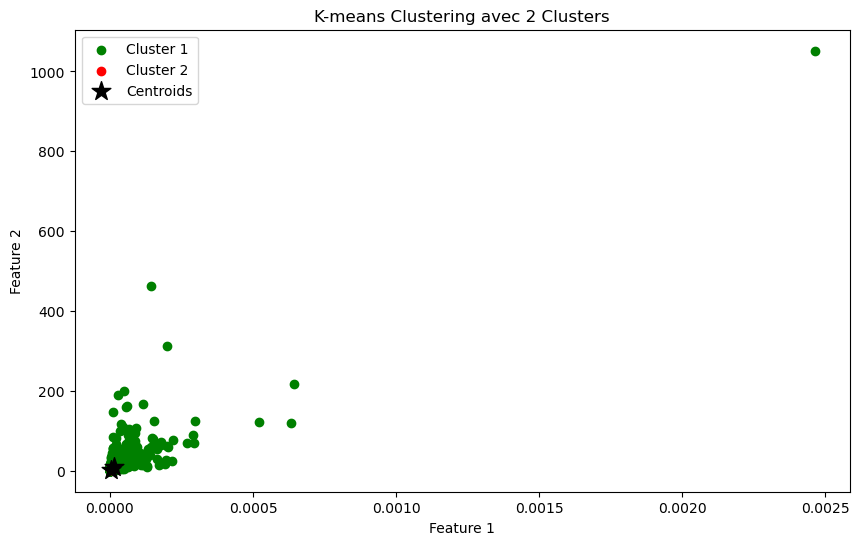

In [12]:
plt.figure(figsize=(10, 6))

# Graphique du nuage de points pour chaque cluster
plt.scatter(X.iloc[labels == 0, 0], X.iloc[labels == 0, 1], c='green', label='Cluster 1')
plt.scatter(X.iloc[labels == 1, 0], X.iloc[labels == 1, 1], c='red', label='Cluster 2')

# Graphique des centroïdes
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='black', label='Centroids')

# Ajout des légendes et titres
plt.legend()
plt.title('K-means Clustering avec 2 Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()

In [13]:
print(len(labels), len(df_fermi))


2274 2274


In [14]:
# Importation de la fonction cdist du package scipy.spatial.distance
from scipy.spatial.distance import cdist

# Liste des nombres de clusters
range_n_clusters = [2, 3, 4, 5, 6]  

# Initialisation de la liste de distorsions
distorsions = []

# Calcul des distorsions pour les différents modèles
for n_clusters in range_n_clusters:
    
    # Initialisation d'un cluster ayant un pour nombre de clusters n_clusters
    cluster = KMeans(n_clusters = n_clusters)
    
    # Apprentissage des données suivant le cluster construit ci-dessus
    cluster.fit(X)
    
    # Ajout de la nouvelle distorsion à la liste des données
    distorsions.append(sum(np.min(cdist(X, cluster.cluster_centers_, 'euclidean'), axis=1)) / np.size(X, axis = 0))

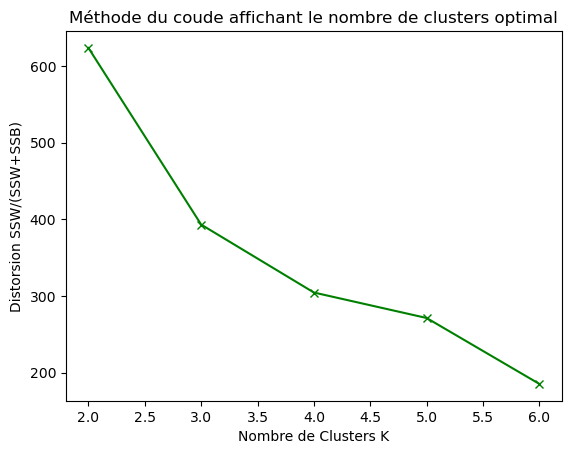

In [15]:
# Visualisation des distorsions en fonction du nombre de clusters
plt.plot(range_n_clusters, distorsions, 'gx-')
plt.xlabel('Nombre de Clusters K')
plt.ylabel('Distorsion SSW/(SSW+SSB)')
plt.title('Méthode du coude affichant le nombre de clusters optimal')
plt.show()
